# Introduction


The main goal of this mini project is to familiarize myself with basic data science tools and concepts. Because the star-dataset stores star properties that are closely related for depicting the Hertzsprung-Russell Diagram, this mini project focuses less on exploratory data analysis (since the relationship between these properties are already well-described) and more on data visualization and machine learning models.

## TODO
* ~~Plot the star dataset in an HR-Diagram~~
* Train an accurate machine learning model to predict a star's type given its properties
    * Determine the most important properties in classifying stars
    * ~~Input a Temoc's characteristics to see if Temoc can be a star both in our hearts and in terms of astrophysics~~
* Use another star dataset that includes other properties such as age and train an ML model to predict a star's age
    * Given a data set of stars in a galaxy, use this ML model to predict the galaxy's age

# Setup

In [193]:
print("Hello, World!")

Hello, World!


In [194]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


In [195]:
# import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="dark")

In [196]:
# Path of the file to read
star_filepath = "../input/star-dataset/6 class csv.csv"

# Read the file into a variable star_data
star_data = pd.read_csv(star_filepath, index_col="Star type")
print(star_data.columns)

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star color', 'Spectral Class'],
      dtype='object')


In [197]:
star_data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


In [198]:
# Constants
L0 = 3.828e26 # Watts (Avg Luminosity of Sun)
R0 = 6.9551e8 # m (Avg Radius of Sun)

## Data Cleaning
Cleaning up data for star color for consistency. Convert to lowercase, replace hyphens with space, and remove puncuations.

In [199]:
# Vector operation to clean star colors
star_data["Star color"] = star_data["Star color"].str.lower().str.replace("-"," ").str.lstrip().str.rstrip()

# Visualizing the Hertzsprung-Russell Diagram 

## HR Diagram with Star Color and Size Depicted


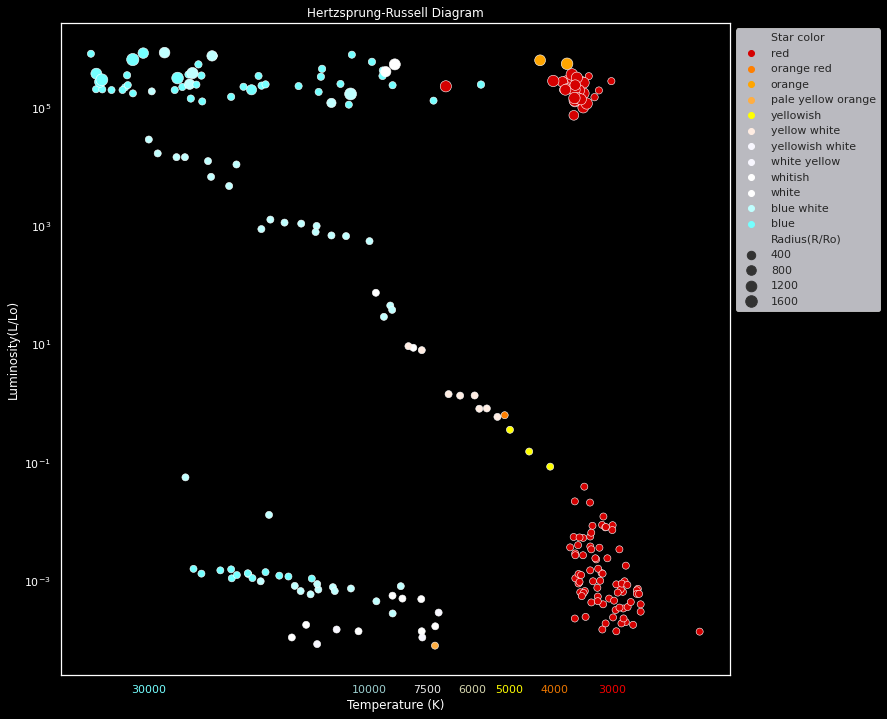

In [200]:
# There were 12 different types of colors in the dataset
# So I give each data point its respective color (as best as I can) when it is plotted
"""
red #D50000
orange red #FF7F00 
orange #ffa500
pale yellow orange #ffae42
yellowish #ffff00 
yellow white #FFEDE3
yellowish white #f8f7ff 
white yellow #f8f7ff 
whitish #FFFFFF
white #FFFFFF
blue white #C0FFFF
blue #75FFFF
"""
hueOrderings = ("red", "orange red", "orange", "pale yellow orange", "yellowish", "yellow white",
                "yellowish white", "white yellow", "whitish", "white", "blue white", "blue")
paletteOrderings = ("#D50000","#FF7F00","#ffa500","#ffae42","#ffff00","#FFEDE3",
                    "#f8f7ff","#f8f7ff","#FFFFFF","#FFFFFF","#C0FFFF","#75FFFF")

# Plotting the scatterplot: Temperature vs Luminosity
# Each point gets a color, and its size is based on Radius
plt.figure(figsize=(12,12), facecolor=("black"))
plt.title("Hertzsprung-Russell Diagram", color="white")
ax = sns.scatterplot(x="Temperature (K)", y="Luminosity(L/Lo)",
                hue="Star color", hue_order=hueOrderings,
                palette=paletteOrderings,
                size="Radius(R/Ro)", sizes=(50,150),
                data=star_data)

# Setting axes to scale logarithmically
ax.set(xscale="log",yscale="log")

# Customizing tick labels for specific tick values for temperature
spectralClassTemperaturesMarks = (3000, 4000, 5000, 6000, 7500, 10000, 30000)
ax.set_xticks(ticks=spectralClassTemperaturesMarks, labels=spectralClassTemperaturesMarks)

# And setting x tick colors to roughly match the spectrum of color according to temperature
    # ax.tick_params("x", colors="white")
xAxisTickColors = ("#f20000","#ec7600","#ffff00","#d7d7af","#ededed","#9dd0d0","#75ffff") # red, orange, yellow, yellowish, white, light blue, cyan-ish
for i in range(len(ax.xaxis.get_ticklabels())):
    ax.xaxis.get_ticklabels()[i].set_color(xAxisTickColors[i])
ax.tick_params("y", colors="white")

# Color axis labels for visibilitiy
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.set_facecolor("black")

# Typical depictions of HR Diagram has temperature decreasing left->right
ax.invert_xaxis()

# Move the legend out of the way
sns.move_legend(ax, loc="upper left", bbox_to_anchor=(1, 1))

### Analysis
This HR Diagram focuses on patterns for star color and star size in relation to temperature and luminosity. 
#### Temperature vs Luminosity Correlation
For both horizontal line sections, the star luminosity range is concentrated on certain values. However, for the diagonal line, it can be seen that temperature is negatively correlated with luminosity.
#### Star Color
Above, it can be seen that colors are split in vertical sections, indicating that star color and temperature are correlated. Stars follow a color spectrum of blue, white, yellow, orange, and red that corresponds to hotter to colder temperatures respectively. Additionally, there are distinct sections in the diagram: a line across the top, a downward-sloping diagonal line, and a line-cluster towards the bottom-left.
#### Star Size
Stars towards the top-left and especially the top-right seem to be the largest while stars in the center diagonal and the bottom left seem to be the smallest. Towards the bottom-right of the diagonal, stars seem to be a little bit larger than their center diagonal neighbors.

## HR Diagram with Star Type Depicted

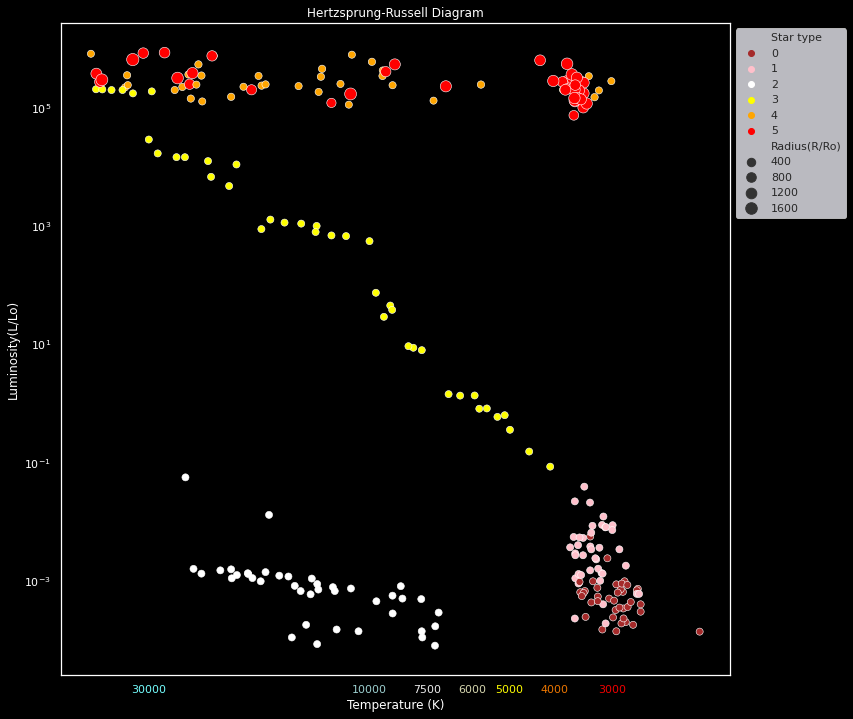

In [201]:
# Star Types
# (Brown Dwarf, Red Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)
# labeled as (0,1,2,3,4,5)
paletteOrderingsStarTypes = ["brown","pink","white","yellow","orange","red"]

# Plotting the scatterplot: Temperature vs Luminosity
# Each point gets a color, and its size is based on Radius
plt.figure(figsize=(12,12), facecolor=("black"))
plt.title("Hertzsprung-Russell Diagram", color="white")
ax = sns.scatterplot(x="Temperature (K)", y="Luminosity(L/Lo)",
                hue="Star type",
                palette=paletteOrderingsStarTypes,
                size="Radius(R/Ro)", sizes=(50,150),
                data=star_data)

# Setting axes to scale logarithmically
ax.set(xscale="log",yscale="log")

# Customizing tick labels for specific tick values for temperature
spectralClassTemperaturesMarks = (3000, 4000, 5000, 6000, 7500, 10000, 30000)
ax.set_xticks(ticks=spectralClassTemperaturesMarks, labels=spectralClassTemperaturesMarks)

# And setting x tick colors to roughly match the spectrum of color according to temperature
    # ax.tick_params("x", colors="white")
xAxisTickColors = ("#f20000","#ec7600","#ffff00","#d7d7af","#ededed","#9dd0d0","#75ffff") # red, orange, yellow, yellowish, white, light blue, cyan-ish
for i in range(len(ax.xaxis.get_ticklabels())):
    ax.xaxis.get_ticklabels()[i].set_color(xAxisTickColors[i])
ax.tick_params("y", colors="white")

# Color axis labels for visibilitiy
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.set_facecolor("black")

# Typical depictions of HR Diagram has temperature decreasing left->right
ax.invert_xaxis()

# Move the legend out of the way
sns.move_legend(ax, loc="upper left", bbox_to_anchor=(1, 1))


* Star Type = 0 -> Brown Dwarf
* Star Type = 1 -> Red Dwarf
* Star Type = 2 -> White Dwarf
* Star Type = 3 -> Main Sequence
* Star Type = 4 -> Supergiant
* Star Type = 5 -> Hypergiant

### Analysis
This HR Diagram focuses on patterns for star types in relation to temperature and luminosity. 
#### Star Type Patterns
* Brown Dwarf: lowest temperature, lowest luminosity
* Red Dwarf: low temperature,low luminosity
* White Dwarf: high-medium temperature, low luminosity
* Main Sequence: high-medium temperature, high-medium luminosity
* Supergiant: high-medium temperature, high luminosity
* Hypergiant: low temperature, high luminosity


# Miscellaneous

## I found the Sun!


In the star dataset, this is likely the data point that is our Sun by observation.

| Absolute Temperature (in K) | Relative Luminosity (L/Lo) | Relative Radius (R/Ro) | Absolute Magnitude (Mv) | Star Color | Spectral Class | Star Type |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 5587 | 0.819 | 0.99 | 5.03 | yellow-white | F | 3 (Main Sequence) |

# Acknowledgements
* Wikipedia
* Seaborn Documentation
* MatplotLib Documentation
* Harvard Center for Astrophysics Research Page